Bortezomib (Velcade) is a proteasome inhibitor and antineoplastic agent that is used in treatment of refractory multiple myeloma and certain lymphomas. Bortezomib is associated with a low rate of serum enzyme elevations during treatment and to rare instances of clinically apparent, acute liver injury.

In [ ]:
! pip install chembl_webresource_client

In [ ]:
# Dependencies
from chembl_webresource_client.new_client import new_client
from chembl_webresource_client.utils import utils
from IPython.display import SVG
import pandas as pd
import json

In [ ]:
# Finding the molecule of interest by its synonyms or comercial name
molecule = new_client.molecule
mols = molecule.filter(molecule_synonyms__molecule_synonym__iexact='velcade')
interest_molecule = pd.DataFrame.from_dict(mols)
interest_molecule

,atc_classifications,availability_type,biotherapeutic,black_box_warning,chebi_par_id,chirality,cross_references,dosed_ingredient,first_approval,first_in_class,helm_notation,indication_class,inorganic_flag,max_phase,molecule_chembl_id,molecule_hierarchy,molecule_properties,molecule_structures,molecule_synonyms,molecule_type,natural_product,oral,parenteral,polymer_flag,pref_name,prodrug,structure_type,therapeutic_flag,topical,usan_stem,usan_stem_definition,usan_substem,usan_year,withdrawn_class,withdrawn_country,withdrawn_flag,withdrawn_reason,withdrawn_year
0,[L01XG01],1,None,0,52717,1,"[{'xref_id': 'bortezomib', 'xref_name': 'borte...",True,2003,1,None,None,0,4,CHEMBL325041,"{'molecule_chembl_id': 'CHEMBL325041', 'parent...","{'alogp': None, 'aromatic_rings': None, 'cx_lo...",{'canonical_smiles': 'CC(C)C[C@H](NC(=O)[C@H](...,"[{'molecule_synonym': 'Bortezomib', 'syn_type'...",Small molecule,0,False,True,False,BORTEZOMIB,0,MOL,True,False,-zomib,proteozome inhibitors,-zomib,2002,None,None,False,None,None


In [ ]:
# Searching the molecule by Bortezomib/Velcade ChEMBL id
molecule = new_client.molecule
m = molecule.filter(chembl_id='CHEMBL325041')
velmol = pd.DataFrame.from_dict(m)
velmol

,atc_classifications,availability_type,biotherapeutic,black_box_warning,chebi_par_id,chirality,cross_references,dosed_ingredient,first_approval,first_in_class,helm_notation,indication_class,inorganic_flag,max_phase,molecule_chembl_id,molecule_hierarchy,molecule_properties,molecule_structures,molecule_synonyms,molecule_type,natural_product,oral,parenteral,polymer_flag,pref_name,prodrug,structure_type,therapeutic_flag,topical,usan_stem,usan_stem_definition,usan_substem,usan_year,withdrawn_class,withdrawn_country,withdrawn_flag,withdrawn_reason,withdrawn_year
0,[L01XG01],1,None,0,52717,1,"[{'xref_id': 'bortezomib', 'xref_name': 'borte...",True,2003,1,None,None,0,4,CHEMBL325041,"{'molecule_chembl_id': 'CHEMBL325041', 'parent...","{'alogp': None, 'aromatic_rings': None, 'cx_lo...",{'canonical_smiles': 'CC(C)C[C@H](NC(=O)[C@H](...,"[{'molecule_synonym': 'Bortezomib', 'syn_type'...",Small molecule,0,False,True,False,BORTEZOMIB,0,MOL,True,False,-zomib,proteozome inhibitors,-zomib,2002,None,None,False,None,None


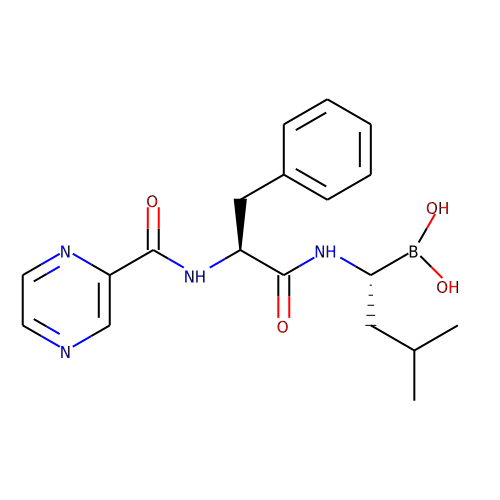

In [ ]:
# Molecule Image of Bortezomib
image = new_client.image
image.set_format('svg')
SVG(image.get('CHEMBL325041'))

In [ ]:
#Molecular descriptors (with Bortezomib Canonical SMILES)
velcade = utils.smiles2ctab('CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)c1cnccn1)B(O)O')
descs = json.loads(utils.chemblDescriptors(velcade))[0]
descs

{'HeavyAtomCount': 28,
 'MolLogP': 0.36059999999999964,
 'MolWt': 384.24500000000006,
 'MolecularFormula': 'C19H25BN4O4',
 'MonoisotopicMolWt': 384.19688568000004,
 'NumAromaticRings': 2,
 'NumHAcceptors': 6,
 'NumHDonors': 4,
 'NumRo5': 0,
 'NumRotatableBonds': 9,
 'Ro3Pass': 0,
 'TPSA': 124.44000000000001,
 'qed': 0.46304615262258836}

In [ ]:
# Compute structural alerts that can be related to Bortezomib
#  structural alerts are high chemical reactivity molecular fragments that can be transformed via bioactivation by 
#  human enzymes into fragments with high chemical reactivity.

mol = utils.smiles2ctab("CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)c1cnccn1)B(O)O")
alerts = json.loads(utils.structuralAlerts(mol))
for a in alerts[0]:
    print(a)

{'alert_id': 100, 'alert_name': 'heavy metal', 'set_name': 'Dundee', 'smarts': '[Hg,Fe,As,Sb,Zn,Se,se,Te,B,Si]'}
{'alert_id': 217, 'alert_name': 'boron_warhead', 'set_name': 'BMS', 'smarts': '[C,c]~[#5]'}
{'alert_id': 1003, 'alert_name': 'unacceptable atoms', 'set_name': 'MLSMR', 'smarts': '[!#6;!#7;!#8;!#16;!#1;!#3;!#9;!#11;!#12;!#15;!#17;!#19;!#20;!#30;!#35]'}
{'alert_id': 1040, 'alert_name': 'Long aliphatic chain', 'set_name': 'MLSMR', 'smarts': '[N,C,S,O]!@[N,C,S,O]!@[N,C,S,O]!@[N,C,S,O]!@[N,C,S,O]!@[N,C,S,O]!@[N,C,S,O]'}
{'alert_id': 1079, 'alert_name': 'Dipeptide', 'set_name': 'MLSMR', 'smarts': '*-C(=O)-&!@[NH]-C-&!@C(=O)-&!@[NH]-*'}


In [ ]:
#calculate the parent molecule of Bortezomib

mol = utils.smiles2ctab("CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)c1cnccn1)B(O)O")
par = json.loads(utils.getParent(mol))
parent = pd.DataFrame(par)
parent

,parent_molblock,exclude
0,\n RDKit 2D\n\n 28 29 0 0 0 0...,False


In [ ]:
# Find compounds similar to Bortezomib with similarity threshold of 70%
similarity = new_client.similarity
res = similarity.filter(smiles="CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)c1cnccn1)B(O)O", similarity=70).only(['molecule_chembl_id', 'similarity'])
for i in res:
    print(i)

{'molecule_chembl_id': 'CHEMBL524664', 'similarity': '100'}
{'molecule_chembl_id': 'CHEMBL1530', 'similarity': '100'}
{'molecule_chembl_id': 'CHEMBL325041', 'similarity': '100'}
{'molecule_chembl_id': 'CHEMBL3559830', 'similarity': '100'}
{'molecule_chembl_id': 'CHEMBL3347626', 'similarity': '98.0392158031463623046875'}
{'molecule_chembl_id': 'CHEMBL605533', 'similarity': '98.0392158031463623046875'}
{'molecule_chembl_id': 'CHEMBL595037', 'similarity': '94.339621067047119140625'}
{'molecule_chembl_id': 'CHEMBL595487', 'similarity': '94.339621067047119140625'}
{'molecule_chembl_id': 'CHEMBL3347642', 'similarity': '89.2857134342193603515625'}
{'molecule_chembl_id': 'CHEMBL594343', 'similarity': '89.2857134342193603515625'}
{'molecule_chembl_id': 'CHEMBL595738', 'similarity': '89.2857134342193603515625'}
{'molecule_chembl_id': 'CHEMBL596195', 'similarity': '83.3333313465118408203125'}
{'molecule_chembl_id': 'CHEMBL3347640', 'similarity': '83.3333313465118408203125'}
{'molecule_chembl_id':

In [ ]:
#Find compounds similar to Bortezomib with similarity threshold of 90%
similarity = new_client.similarity
res = similarity.filter(chembl_id='CHEMBL325041', similarity=90).only(['molecule_chembl_id', 'pref_name', 'similarity'])
res
for i in res:
    print(i)

{'molecule_chembl_id': 'CHEMBL3559830', 'pref_name': None, 'similarity': '100'}
{'molecule_chembl_id': 'CHEMBL524664', 'pref_name': None, 'similarity': '100'}
{'molecule_chembl_id': 'CHEMBL1530', 'pref_name': None, 'similarity': '100'}
{'molecule_chembl_id': 'CHEMBL605533', 'pref_name': None, 'similarity': '98.0392158031463623046875'}
{'molecule_chembl_id': 'CHEMBL3347626', 'pref_name': None, 'similarity': '98.0392158031463623046875'}
{'molecule_chembl_id': 'CHEMBL595487', 'pref_name': None, 'similarity': '94.339621067047119140625'}
{'molecule_chembl_id': 'CHEMBL595037', 'pref_name': None, 'similarity': '94.339621067047119140625'}


In [ ]:
#Get all activities for Bortezomib
activities = new_client.activity
res = activities.filter(molecule_chembl_id="CHEMBL325041", pchembl_value__isnull=False)

len(res)

621

In [ ]:
# get a DataFrame with all Bortezomib activities
df = pd.DataFrame.from_dict(res)
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,89208,[],CHEMBL768300,Inhibitory activity against 20S Proteasome,B,None,None,BAO_0000192,BAO_0000220,subcellular format,CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)c1cncc...,None,None,CHEMBL1130744,Bioorg. Med. Chem. Lett.,1998.0,None,CHEMBL325041,BORTEZOMIB,CHEMBL325041,9.21,False,http://www.openphacts.org/units/Nanomolar,215131,=,1,True,=,None,Ki,nM,None,0.62,CHEMBL612443,None,Proteasome,None,None,None,Ki,nM,UO_0000065,None,0.62
1,None,89209,[],CHEMBL677599,Inhibitory activity against human leukocyte el...,B,None,None,BAO_0000192,BAO_0000357,single protein format,CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)c1cncc...,None,None,CHEMBL1130744,Bioorg. Med. Chem. Lett.,1998.0,"{'bei': '14.67', 'le': None, 'lle': None, 'sei...",CHEMBL325041,BORTEZOMIB,CHEMBL325041,5.64,False,http://www.openphacts.org/units/Nanomolar,215131,=,1,True,=,None,Ki,nM,None,2300.0,CHEMBL248,Homo sapiens,Leukocyte elastase,9606,None,None,Ki,nM,UO_0000065,None,2300.0
2,None,89210,[],CHEMBL661898,Inhibitory activity against human cathepsin G,B,None,None,BAO_0000192,BAO_0000357,single protein format,CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)c1cncc...,None,None,CHEMBL1130744,Bioorg. Med. Chem. Lett.,1998.0,"{'bei': '16.14', 'le': None, 'lle': None, 'sei...",CHEMBL325041,BORTEZOMIB,CHEMBL325041,6.20,False,http://www.openphacts.org/units/Nanomolar,215131,=,1,True,=,None,Ki,nM,None,630.0,CHEMBL4071,Homo sapiens,Cathepsin G,9606,None,None,Ki,nM,UO_0000065,None,630.0
3,None,89211,[],CHEMBL662080,Inhibitory activity against human Chymotrypsin...,B,None,None,BAO_0000192,BAO_0000357,single protein format,CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)c1cncc...,None,None,CHEMBL1130744,Bioorg. Med. Chem. Lett.,1998.0,"{'bei': '16.90', 'le': None, 'lle': None, 'sei...",CHEMBL325041,BORTEZOMIB,CHEMBL325041,6.50,False,http://www.openphacts.org/units/Nanomolar,215131,=,1,True,=,None,Ki,nM,None,320.0,CHEMBL4796,Homo sapiens,Beta-chymotrypsin,9606,None,None,Ki,nM,UO_0000065,None,320.0
4,None,89212,[],CHEMBL813436,Inhibitory activity against thrombin,B,None,None,BAO_0000192,BAO_0000357,single protein format,CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)c1cncc...,None,None,CHEMBL1130744,Bioorg. Med. Chem. Lett.,1998.0,"{'bei': '12.72', 'le': None, 'lle': None, 'sei...",CHEMBL325041,BORTEZOMIB,CHEMBL325041,4.89,False,http://www.openphacts.org/units/Nanomolar,215131,=,1,True,=,None,Ki,nM,None,13000.0,CHEMBL204,Homo sapiens,Thrombin,9606,None,None,Ki,nM,UO_0000065,None,13000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,None,19300214,[],CHEMBL4413412,Inhibition of human hepatic cell derived 20s c...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)c1cncc...,None,None,CHEMBL4411311,Eur J Med Chem,2019.0,"{'bei': '18.17', 'le': None, 'lle': None, 'sei...",CHEMBL325041,BORTEZOMIB,CHEMBL325041,6.98,False,http://www.openphacts.org/units/Nanomolar,3222746,=,1,True,=,None,IC50,nM,None,104.0,CHEMBL4208,Homo sapiens,Proteasome component C5,9606,None,None,IC50,nM,UO_0000065,None,104.0
617,None,19365867,[],CHEMBL4423851,Inhibition of human 20s proteasome subunit bet...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC(C)C[C@H](NC(=O)[C@H](Cc

In [ ]:
df.standard_type.unique()

array(['Ki', 'IC50', 'EC50'], dtype=object)

In [ ]:
df.to_csv('bortezomib_activities.csv', index=False) 